# Imports

In [20]:
from requests import get
from bs4 import BeautifulSoup
import os
from time import sleep
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
import unicodedata
import json

## Data Acquisition

### Acquiring a list of movies.
100 Most Popular Movies on IMDb.

In [2]:
url = '''https://www.imdb.com/chart/moviemeter?ref_=nv_mv_mpm'''
response = get(url)

In [3]:
print(response.text[:400])




<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    
    
    

    
    
    

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">
            <style>
                body#styleguide


In [4]:
soup = BeautifulSoup(response.content, 
#                     'lxml')
                    'html.parser')

In [5]:
# see also `soup.find_all`

messy_movies = soup.find_all('td', class_='titleColumn')

In [6]:
len(messy_movies)

100

In [7]:
movies = []
trigger1 = []
for movie in messy_movies:
    movie_title = movie.find('a').text.lower().replace(' ', '%20')
    movies.append(re.sub(r"[^a-z0-9%\s]", '', movie_title))
    trigger1.append(False)
movies

['spiderman%20far%20from%20home',
 'midsommar',
 'toy%20story%204',
 'yesterday',
 'once%20upon%20a%20time%20%20in%20hollywood',
 'spiderman%20into%20the%20spiderverse',
 'avengers%20endgame',
 'knives%20out',
 'the%20lion%20king',
 'annabelle%20comes%20home',
 'shaft',
 'alita%20battle%20angel',
 'charlies%20angels',
 'shazam',
 'jumanji%20the%20next%20level',
 'murder%20mystery',
 'after',
 'aladdin',
 'hellboy',
 'rocketman',
 'spiderman%20homecoming',
 'childs%20play',
 'anna',
 'men%20in%20black%20international',
 'captain%20marvel',
 'midway',
 'john%20wick%20chapter%203%20%20parabellum',
 'us',
 'fast%20%20furious%20presents%20hobbs%20%20shaw',
 'crawl',
 'hereditary',
 'i%20am%20mother',
 'escape%20plan%20the%20extractors',
 'star%20wars%20the%20rise%20of%20skywalker',
 'robin%20hood',
 'pet%20sematary',
 'dark%20phoenix',
 'kabir%20singh',
 'the%20little%20mermaid',
 'dumbo',
 'the%20spy%20who%20dumped%20me',
 'godzilla%20king%20of%20the%20monsters',
 'it%20chapter%20two',
 's

### Acquiring a list of movies with triggers.

In [8]:
url = '''https://istheresuicideinit.tumblr.com/post/116009541869/films'''
response = get(url)

In [9]:
soup = BeautifulSoup(response.content, 
#                     'lxml')
                    'html.parser')

In [10]:
# see also `soup.find_all`

trigger_movies = soup.find('ul')
trigger_movies.find_all('li')

[<li>2:37 (2006)</li>,
 <li>3 idiots (2009)</li>,
 <li>28 days later (2002)</li>,
 <li>47 ronin (2013)</li>,
 <li>1408 (2007)</li>,
 <li>a clockwork orange (1971)</li>,
 <li>airplane! (1980)</li>,
 <li>almost famous (2000)</li>,
 <li>a long way down (2014)</li>,
 <li>always watching: a marble hornets story (2015)</li>,
 <li>a mother’s nightmare (2012)</li>,
 <li>an american werewolf in london (1981)</li>,
 <li>annabelle (2014)</li>,
 <li>anchorman 2: the legend continues (2013)</li>,
 <li>archie’s final project (2011)</li>,
 <li>arizona dream (1992) </li>,
 <li>as above, so below (2014)</li>,
 <li>a single man (2009)</li>,
 <li>a streetcar named desire (1951, 1984, 1987)</li>,
 <li>battle royale (2000)</li>,
 <li>before I disappear (2014)</li>,
 <li>ben x (2007)</li>,
 <li>better off dead (1985)</li>,
 <li>birdman: or (the unexpected virtue of ignorance) (2014)</li>,
 <li>blackbird (2014)</li>,
 <li>black swan (2010)</li>,
 <li>boogie nights (1997)</li>,
 <li>boogeyman 2 (2007)</li>,
 

In [11]:
trigger_movies_list = []
trigger2 = []
for trigger_movie in trigger_movies:
    movie_title = trigger_movie.text.replace(' ', '%20')
    movie_title = re.sub(r"[^\w%]", '', movie_title)
    trigger_movies_list.append(re.sub(r"[\d%]+$", '', movie_title))
    trigger2.append(True)
trigger_movies_list

['',
 '3%20idiots',
 '28%20days%20later',
 '47%20ronin',
 '',
 'a%20clockwork%20orange',
 'airplane',
 'almost%20famous',
 'a%20long%20way%20down',
 'always%20watching%20a%20marble%20hornets%20story',
 'a%20mothers%20nightmare',
 'an%20american%20werewolf%20in%20london',
 'annabelle',
 'anchorman%202%20the%20legend%20continues',
 'archies%20final%20project',
 'arizona%20dream',
 'as%20above%20so%20below',
 'a%20single%20man',
 'a%20streetcar%20named%20desire',
 'battle%20royale',
 'before%20I%20disappear',
 'ben%20x',
 'better%20off%20dead',
 'birdman%20or%20the%20unexpected%20virtue%20of%20ignorance',
 'blackbird',
 'black%20swan',
 'boogie%20nights',
 'boogeyman',
 'casino%20royale',
 'carrie',
 'charlie%20bartlett',
 'chatroom',
 'cloud%20atlas',
 'constantine',
 'cozy%20dens%20czech%20Pelíšky',
 'cyberbully',
 'cyberbully',
 'dead%20poets%20society',
 'dear%20lemon%20lima',
 'detachment',
 'die%20welle%20german',
 'disconnect',
 'divergent',
 'donnie%20darko',
 'edge%20of%20tomorro

In [12]:
len(trigger_movies_list)

159

In [13]:
trigger1.extend(trigger2)
len(trigger1)

259

In [14]:
movies.extend(trigger_movies_list)

### Scraping tweets from Twitter.

In [15]:
browser = webdriver.Chrome()
# print('Connecting to Twitter')


tweets = []
tweets_movie_title = []
tweets_trigger = []


for movie, trigger in list(zip(movies, trigger1)):
    # print(f'Looking up {movie}')
    browser.get(f"https://twitter.com/search?q={movie}%20trigger&src=typd")
    # time.sleep(1)

    elem = browser.find_element_by_tag_name("body")

    no_of_pagedowns = 18
    # print('Scrolling thru page.')

    while no_of_pagedowns:
        elem.send_keys(Keys.PAGE_DOWN)
        # time.sleep(0.2)
        no_of_pagedowns-=1

    post_elems = browser.find_elements_by_class_name("js-tweet-text-container")
    # print('Grabbing Tweets.')

    for post in post_elems:
        tweets.append(post.text)
        tweets_movie_title.append(movie)
        tweets_trigger.append(trigger)
    # print('Completed.')

In [224]:
df = pd.DataFrame({'title':tweets_movie_title, 'tweet':tweets, 'trigger_scene':tweets_trigger})
df.head()

,title,tweet,trigger_scene
0,spiderman%20far%20from%20home,⠀⠀ ❝You don't want any part in this...❞\n⠀⠀ ⠀❧...,False
1,spiderman%20far%20from%20home,why does this trigger me so much :((\n\n#FarFr...,False
2,spiderman%20far%20from%20home,Trigger warning for all photographers before s...,False
3,spiderman%20far%20from%20home,the gaslighting and anxiety spiderman had made...,False
4,spiderman%20far%20from%20home,it trigger me every time there's a spiderman f...,False


## Data Preparation

##### Fixing title column.

In [225]:
df.title = df.title.str.replace('%20', '_')
df.head()

,title,tweet,trigger_scene
0,spiderman_far_from_home,⠀⠀ ❝You don't want any part in this...❞\n⠀⠀ ⠀❧...,False
1,spiderman_far_from_home,why does this trigger me so much :((\n\n#FarFr...,False
2,spiderman_far_from_home,Trigger warning for all photographers before s...,False
3,spiderman_far_from_home,the gaslighting and anxiety spiderman had made...,False
4,spiderman_far_from_home,it trigger me every time there's a spiderman f...,False


##### Lowercasing the text.

In [226]:
df['cleaned_text'] = df.tweet.str.lower()
df.head()

,title,tweet,trigger_scene,cleaned_text
0,spiderman_far_from_home,⠀⠀ ❝You don't want any part in this...❞\n⠀⠀ ⠀❧...,False,⠀⠀ ❝you don't want any part in this...❞\n⠀⠀ ⠀❧...
1,spiderman_far_from_home,why does this trigger me so much :((\n\n#FarFr...,False,why does this trigger me so much :((\n\n#farfr...
2,spiderman_far_from_home,Trigger warning for all photographers before s...,False,trigger warning for all photographers before s...
3,spiderman_far_from_home,the gaslighting and anxiety spiderman had made...,False,the gaslighting and anxiety spiderman had made...
4,spiderman_far_from_home,it trigger me every time there's a spiderman f...,False,it trigger me every time there's a spiderman f...


##### Converting and standardizing accented characters into ASCII characters.

In [227]:
def replace_accented_characters(text):
    no_accent_text = unicodedata.normalize('NFKD', text)\
                        .encode('ascii', 'ignore')\
                        .decode('utf-8', 'ignore')
    return no_accent_text

df.cleaned_text = df.cleaned_text.apply(remove_accented_characters)
df.head()

,title,tweet,trigger_scene,cleaned_text
0,spiderman_far_from_home,⠀⠀ ❝You don't want any part in this...❞\n⠀⠀ ⠀❧...,False,you don't want any part in this...\n q b. as...
1,spiderman_far_from_home,why does this trigger me so much :((\n\n#FarFr...,False,why does this trigger me so much :((\n\n#farfr...
2,spiderman_far_from_home,Trigger warning for all photographers before s...,False,trigger warning for all photographers before s...
3,spiderman_far_from_home,the gaslighting and anxiety spiderman had made...,False,the gaslighting and anxiety spiderman had made...
4,spiderman_far_from_home,it trigger me every time there's a spiderman f...,False,it trigger me every time there's a spiderman f...


##### Removing special characters.

In [228]:
# remove anything that is not a through z, a number, a single quote, or whitespace
def remove_special_characters(text):
    no_special_text = re.sub(r"[^a-z0-9\s]", '', text)
    return no_special_text

df.cleaned_text = df.cleaned_text.apply(remove_special_characters)
df.head()

,title,tweet,trigger_scene,cleaned_text
0,spiderman_far_from_home,⠀⠀ ❝You don't want any part in this...❞\n⠀⠀ ⠀❧...,False,you dont want any part in this\n q b as ms \...
1,spiderman_far_from_home,why does this trigger me so much :((\n\n#FarFr...,False,why does this trigger me so much \n\nfarfromho...
2,spiderman_far_from_home,Trigger warning for all photographers before s...,False,trigger warning for all photographers before s...
3,spiderman_far_from_home,the gaslighting and anxiety spiderman had made...,False,the gaslighting and anxiety spiderman had made...
4,spiderman_far_from_home,it trigger me every time there's a spiderman f...,False,it trigger me every time theres a spiderman fa...


##### Tokenization

In [229]:
def tokenize_text(text):
    tokenizer = nltk.tokenize.ToktokTokenizer()
    return tokenizer.tokenize(text, return_str=True)

df.cleaned_text = df.cleaned_text.apply(tokenize_text)
df.head()

,title,tweet,trigger_scene,cleaned_text
0,spiderman_far_from_home,⠀⠀ ❝You don't want any part in this...❞\n⠀⠀ ⠀❧...,False,you dont want any part in this\n q b as ms \n ...
1,spiderman_far_from_home,why does this trigger me so much :((\n\n#FarFr...,False,why does this trigger me so much \n\nfarfromho...
2,spiderman_far_from_home,Trigger warning for all photographers before s...,False,trigger warning for all photographers before s...
3,spiderman_far_from_home,the gaslighting and anxiety spiderman had made...,False,the gaslighting and anxiety spiderman had made...
4,spiderman_far_from_home,it trigger me every time there's a spiderman f...,False,it trigger me every time theres a spiderman fa...


##### Stemming

In [230]:
# Create the nltk stemmer object, then use it
def stemmer(text):
    ps = nltk.porter.PorterStemmer()
    stemmed_list = [ps.stem(word) for word in text.split()]
    stemmed_text = ' '.join(stemmed_list)
    return stemmed_text

df['stemmed_text'] = df.cleaned_text.apply(stemmer)
df.head()

,title,tweet,trigger_scene,cleaned_text,stemmed_text
0,spiderman_far_from_home,⠀⠀ ❝You don't want any part in this...❞\n⠀⠀ ⠀❧...,False,you dont want any part in this\n q b as ms \n ...,you dont want ani part in thi q b as ms spider...
1,spiderman_far_from_home,why does this trigger me so much :((\n\n#FarFr...,False,why does this trigger me so much \n\nfarfromho...,whi doe thi trigger me so much farfromhom spid...
2,spiderman_far_from_home,Trigger warning for all photographers before s...,False,trigger warning for all photographers before s...,trigger warn for all photograph befor see spid...
3,spiderman_far_from_home,the gaslighting and anxiety spiderman had made...,False,the gaslighting and anxiety spiderman had made...,the gaslight and anxieti spiderman had made me...
4,spiderman_far_from_home,it trigger me every time there's a spiderman f...,False,it trigger me every time theres a spiderman fa...,it trigger me everi time there a spiderman far...


In [231]:
pd.Series(' '.join(df.stemmed_text).split()).value_counts().head(10)

the        3729
trigger    3315
a          2128
to         2017
and        1615
i          1529
of         1412
it         1213
in         1100
is         1043
dtype: int64

##### Lemmatizing

In [232]:
def lemmatizer(text):
    wnl = nltk.stem.WordNetLemmatizer()
    lemmatized_list = [wnl.lemmatize(word) for word in text.split()]
    lemmatized_text = ' '.join(lemmatized_list)
    return lemmatized_text

df['lemmatized_text'] = df.cleaned_text.apply(lemmatizer)
df.head()

,title,tweet,trigger_scene,cleaned_text,stemmed_text,lemmatized_text
0,spiderman_far_from_home,⠀⠀ ❝You don't want any part in this...❞\n⠀⠀ ⠀❧...,False,you dont want any part in this\n q b as ms \n ...,you dont want ani part in thi q b as ms spider...,you dont want any part in this q b a m spiderm...
1,spiderman_far_from_home,why does this trigger me so much :((\n\n#FarFr...,False,why does this trigger me so much \n\nfarfromho...,whi doe thi trigger me so much farfromhom spid...,why doe this trigger me so much farfromhome sp...
2,spiderman_far_from_home,Trigger warning for all photographers before s...,False,trigger warning for all photographers before s...,trigger warn for all photograph befor see spid...,trigger warning for all photographer before se...
3,spiderman_far_from_home,the gaslighting and anxiety spiderman had made...,False,the gaslighting and anxiety spiderman had made...,the gaslight and anxieti spiderman had made me...,the gaslighting and anxiety spiderman had made...
4,spiderman_far_from_home,it trigger me every time there's a spiderman f...,False,it trigger me every time theres a spiderman fa...,it trigger me everi time there a spiderman far...,it trigger me every time there a spiderman far...


In [233]:
pd.Series(' '.join(df.lemmatized_text).split()).value_counts().head(10)

the        3729
trigger    3286
a          2424
to         2017
and        1615
i          1529
of         1412
it         1213
in         1100
is         1043
dtype: int64

##### Removing stopwords

In [234]:
stopwords_to_add = ' '.join(movies).replace('%20', ' ').split()
stopwords_to_add[:20]

['spiderman',
 'far',
 'from',
 'home',
 'midsommar',
 'toy',
 'story',
 '4',
 'yesterday',
 'once',
 'upon',
 'a',
 'time',
 'in',
 'hollywood',
 'spiderman',
 'into',
 'the',
 'spiderverse',
 'avengers']

In [235]:
stopword_list = stopwords.words('english')

stopword_list.remove('no')
stopword_list.remove('not')

stopword_list.extend(stopwords_to_add)

# stopword_list.remove('warning')
stopword_list.remove('suicide')
stopword_list.remove('suicides')

print('warning' in stopword_list)

stopword_list[:10]

False


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [236]:
def remove_stopwords(text):
    words = text.split()
    filtered_words = [w for w in words if w not in stopword_list]
    text_without_stopwords = ' '.join(filtered_words)
    return text_without_stopwords

df['lemmatized_no_stopwords'] = df.lemmatized_text.apply(remove_stopwords)
df.head()

,title,tweet,trigger_scene,cleaned_text,stemmed_text,lemmatized_text,lemmatized_no_stopwords
0,spiderman_far_from_home,⠀⠀ ❝You don't want any part in this...❞\n⠀⠀ ⠀❧...,False,you dont want any part in this\n q b as ms \n ...,you dont want ani part in thi q b as ms spider...,you dont want any part in this q b a m spiderm...,want part q b trigger warning selective ship m...
1,spiderman_far_from_home,why does this trigger me so much :((\n\n#FarFr...,False,why does this trigger me so much \n\nfarfromho...,whi doe thi trigger me so much farfromhom spid...,why doe this trigger me so much farfromhome sp...,doe trigger much farfromhome
2,spiderman_far_from_home,Trigger warning for all photographers before s...,False,trigger warning for all photographers before s...,trigger warn for all photograph befor see spid...,trigger warning for all photographer before se...,trigger warning photographer seeing
3,spiderman_far_from_home,the gaslighting and anxiety spiderman had made...,False,the gaslighting and anxiety spiderman had made...,the gaslight and anxieti spiderman had made me...,the gaslighting and anxiety spiderman had made...,gaslighting anxiety made cry lot fuckkkkkkkk t...
4,spiderman_far_from_home,it trigger me every time there's a spiderman f...,False,it trigger me every time theres a spiderman fa...,it trigger me everi time there a spiderman far...,it trigger me every time there a spiderman far...,trigger every trailer tv start nowhere playing...


In [237]:
pd.Series(' '.join(df.lemmatized_no_stopwords).split()).value_counts().head()

trigger    3286
warning     402
wa          390
like        365
im          307
dtype: int64

In [238]:
df['stemmed_no_stopwords'] = df.stemmed_text.apply(remove_stopwords)
df.head()

,title,tweet,trigger_scene,cleaned_text,stemmed_text,lemmatized_text,lemmatized_no_stopwords,stemmed_no_stopwords
0,spiderman_far_from_home,⠀⠀ ❝You don't want any part in this...❞\n⠀⠀ ⠀❧...,False,you dont want any part in this\n q b as ms \n ...,you dont want ani part in thi q b as ms spider...,you dont want any part in this q b a m spiderm...,want part q b trigger warning selective ship m...,want ani part thi q b ms trigger warn select s...
1,spiderman_far_from_home,why does this trigger me so much :((\n\n#FarFr...,False,why does this trigger me so much \n\nfarfromho...,whi doe thi trigger me so much farfromhom spid...,why doe this trigger me so much farfromhome sp...,doe trigger much farfromhome,whi doe thi trigger much farfromhom
2,spiderman_far_from_home,Trigger warning for all photographers before s...,False,trigger warning for all photographers before s...,trigger warn for all photograph befor see spid...,trigger warning for all photographer before se...,trigger warning photographer seeing,trigger warn photograph befor see
3,spiderman_far_from_home,the gaslighting and anxiety spiderman had made...,False,the gaslighting and anxiety spiderman had made...,the gaslight and anxieti spiderman had made me...,the gaslighting and anxiety spiderman had made...,gaslighting anxiety made cry lot fuckkkkkkkk t...,gaslight anxieti made cri lot fuckkkkkkkk onli...
4,spiderman_far_from_home,it trigger me every time there's a spiderman f...,False,it trigger me every time theres a spiderman fa...,it trigger me everi time there a spiderman far...,it trigger me every time there a spiderman far...,trigger every trailer tv start nowhere playing...,trigger everi trailer tv start nowher tom holl...


In [239]:
pd.Series(' '.join(df.stemmed_no_stopwords).split()).value_counts().head()

trigger    3315
thi         521
warn        417
pull        408
wa          390
dtype: int64

### Data Exploration

##### How are the classes split up?

In [240]:
labels = pd.concat([df.trigger_scene.value_counts(), df.trigger_scene.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'proportion']
labels

,n,proportion
True,2061,0.604045
False,1351,0.395955


##### Exploring frequency of words based on classification.

In [241]:
trigger_scene_words = ' '.join(df[df.trigger_scene == True].lemmatized_no_stopwords)
no_trigger_scene_words = ' '.join(df[df.trigger_scene == False].lemmatized_no_stopwords)
all_words = ' '.join(df.lemmatized_no_stopwords)

In [242]:
trigger_scene_freq = pd.Series(trigger_scene_words.split()).value_counts()
no_trigger_scene_freq = pd.Series(no_trigger_scene_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [243]:
trigger_scene_freq.head()

trigger    1989
warning     237
wa          197
like        192
im          170
dtype: int64

##### Combining frequency Series into one DataFrame.

In [244]:
word_counts = (pd.concat([all_freq, trigger_scene_freq, no_trigger_scene_freq], axis=1, sort=True)
 .set_axis(['all', 'trigger', 'no_trigger'], axis=1, inplace=False)
 .fillna(0)
 .astype('int'))

word_counts.head()

,all,trigger,no_trigger
0,4,4,0
002,1,1,0
007,4,4,0
02,2,1,1
0298,1,1,0


##### Exploring the frequencies dataframe.

In [245]:
word_counts.sort_values(by='all', ascending=False).head(10)

,all,trigger,no_trigger
trigger,3286,1989,1297
warning,402,237,165
wa,390,197,193
like,365,192,173
im,307,170,137
movie,305,167,138
pull,246,163,83
ha,174,108,66
get,163,93,70
u,162,84,78


'Trigger' is most popular word since it is included in the search that is done when scraping the tweets. 'Warning' is second most popular, with the pupularity rank being slightly different for trigger vs. no trigger. 'Movie' can probably be removed.

##### Checking to see if there are any words that are unique to movies with trigger scenes or not.

In [246]:
word_counts[word_counts.no_trigger == 0].sort_values(by='trigger', ascending=False).head(10)

,all,trigger,no_trigger
horn,21,21,0
goony,21,21,0
poet,15,15,0
thomas,9,9,0
rock,9,9,0
higher,9,9,0
step,9,9,0
bond,8,8,0
machine,8,8,0
mcdonald,8,8,0


In [247]:
word_counts[word_counts.trigger == 0].sort_values(by='no_trigger', ascending=False).head(10)

,all,trigger,no_trigger
asian,24,0,24
l1r1,13,0,13
kabirsingh,11,0,11
joystick,10,0,10
explain,9,0,9
kyoani,8,0,8
casting,8,0,8
pixar,8,0,8
gamepad,8,0,8
wheres,7,0,7


Text(0.5, 1.0, 'Proportion of Trigger vs No Trigger for the 20 most common words')

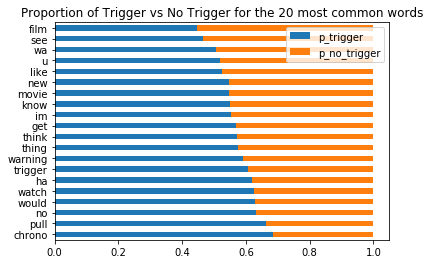

In [248]:
# figure out the percentage of spam vs ham
(word_counts
 .assign(p_trigger=word_counts.trigger / word_counts['all'],
         p_no_trigger=word_counts.no_trigger / word_counts['all'])
 .sort_values(by='all')
 [['p_trigger', 'p_no_trigger']]
 .tail(20)
 .sort_values('p_no_trigger')
 .plot.barh(stacked=True))

plt.title('Proportion of Trigger vs No Trigger for the 20 most common words')